#Güç Yasası Dönüşümü (Power Law Transform) İle Görüntü İyileştirme

Giriş olarak 8-bit gri tonlamalı bir görüntü okunmuştur.

Piksel değerleri, güç yasası dönüşümünün doğru uygulanabilmesi için
$[0,1]$ aralığına normalize edilmiştir.

Güç yasası dönüşümü aşağıdaki formüle göre uygulanmıştır:

$$
s = c \cdot r^{\gamma}
$$

Bu çalışmada sabit katsayı
$c = 1$
olarak alınmıştır.

Farklı gama ($\gamma$) değerleri kullanılarak dönüşümün görüntü üzerindeki
etkileri gözlemlenmiştir.

Elde edilen sonuçlar tekrar 8-bit
$(0\text{–}255)$
aralığına ölçeklendirilerek görselleştirilmiştir.


γ < 1 (örneğin 0.4, 0.7):
- Karanlık bölgeleri aydınlatır.
- Düşük aydınlatmalı görüntüler için uygundur.
- Gölgelerdeki detayları ortaya çıkarır.

γ = 1:
- Görüntü üzerinde herhangi bir değişiklik oluşturmaz.
- Referans durum olarak kullanılır.

γ > 1 (örneğin 1.5, 2.2):
- Parlak bölgeleri baskılar.
- Aşırı parlak görüntülerde kontrastı dengeler.
- Açık tonlardaki detayları vurgular.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


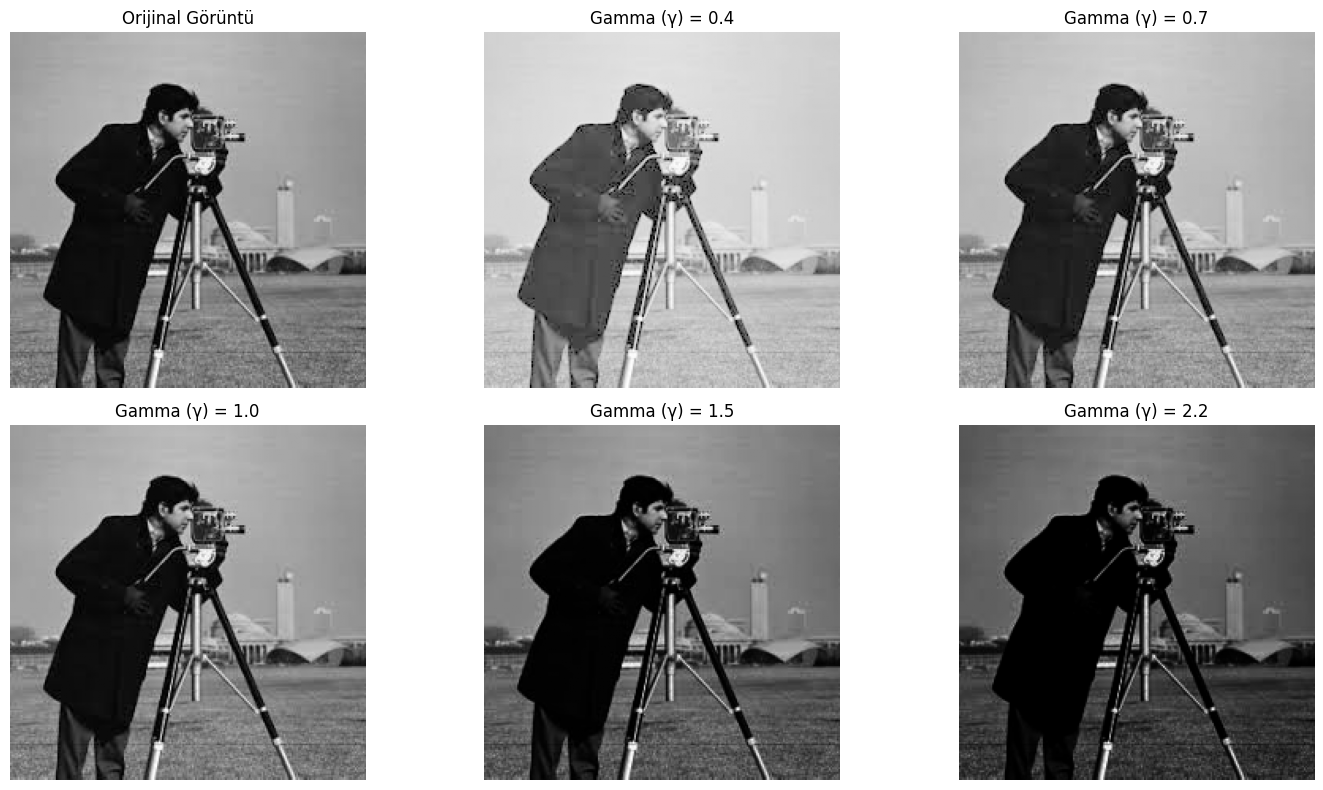

In [ ]:
# Gerekli kütüphanelerin içe aktarılması
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 8-bit gri tonlamalı görüntünün okunması
image_path = "/content/drive/MyDrive/Colab Notebooks/islem/cameraman_test_image_grayscale.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Görüntünün doğru okunup okunmadığını kontrol et
if image is None:
    raise ValueError("Görüntü yüklenemedi. Dosya yolunu kontrol ediniz.")

# 2. Görüntünün [0,1] aralığına normalize edilmesi
# Power-law dönüşümü genellikle normalize edilmiş değerler üzerinde uygulanır
image_norm = image / 255.0

# Denenecek gama (γ) değerleri
gamma_values = [0.4, 0.7, 1.0, 1.5, 2.2]

# Görselleştirme
plt.figure(figsize=(15, 8))

# Orijinal görüntü
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Görüntü")
plt.axis("off")

# 3. Güç yasası dönüşümünün uygulanması
# s = c * r^gamma, burada c = 1
for i, gamma in enumerate(gamma_values):
    # Power law dönüşümü
    transformed = np.power(image_norm, gamma)

    # Tekrar 8-bit ölçeğe dönüştürme
    transformed_8bit = np.uint8(transformed * 255)

    # Görselleştirme
    plt.subplot(2, 3, i + 2)
    plt.imshow(transformed_8bit, cmap='gray')
    plt.title(f"Gamma (γ) = {gamma}")
    plt.axis("off")

plt.tight_layout()
plt.show()
